# Technical Task - Applied Predictive Analysis 1.0

### Created by: Dody Harianto

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.datasets import load_breast_cancer

Load the dataset from `sklearn.datasets`.

In [ ]:
cancer_data = load_breast_cancer()
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

Display the description of the breast cancer data.

In [ ]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The type of `cancer_data` is still a bunch (similar to dictionary), so it is better to convert it into a dataframe.

In [ ]:
type(cancer_data)

sklearn.utils.Bunch

In [ ]:
cancer_df = pd.DataFrame(data = cancer_data['data'], columns = cancer_data['feature_names'])
# cancer_df['target'] = cancer_data['target']
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
actual_values = cancer_data['target']

Check the glimpse about the dataset (data types and missing values in the columns) using `.info()` method as well as some summary statistics using the `.describe()` method.

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

If a current cell has the `%%timeit` command, it's better to comment the command first, run the next cell, and then run the current cell, to avoid the error: KMeans variable is not defined.

In [ ]:
# %%timeit
kmeans_initial = KMeans(n_clusters = 2, random_state = 42)
kmeans_initial.fit(cancer_df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans_initial.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
ari_before_scaling = adjusted_rand_score(kmeans_initial.labels_, actual_values)
ari_before_scaling

0.49142453622455523

# Scaling
Before proceeding into the dimensionality reduction step using Principal Component Analysis (PCA), we should scale the data, otherwise PCA will underperform.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(cancer_df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
cancer_df_scaled = pd.DataFrame(scaled_data)
cancer_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# %%timeit
kmeans_scaled = KMeans(n_clusters = 2, random_state = 42)
kmeans_scaled.fit(cancer_df_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans_scaled.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
ari_after_scaling = adjusted_rand_score(kmeans_scaled.labels_, actual_values)
ari_after_scaling

0.6707206476880808

# Principal Component Analysis (PCA)

PCA is one of the most well-known method for dimensionality reduction.

# PCA With 10 Components

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_10 = PCA(n_components = 10)
pca_10_data = pca_10.fit_transform(cancer_df_scaled)
pca_10_data

array([[ 9.19283683,  1.94858307, -1.12316617, ..., -0.39840786,
        -0.15711714, -0.87742617],
       [ 2.3878018 , -3.76817174, -0.52929268, ...,  0.24098981,
        -0.71190597,  1.10701245],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737271,
         0.02407066,  0.45423468],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188864,
         0.39391451,  0.52089457],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023958,
        -0.54203142, -0.08931744],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635162,
         0.37410917, -0.04778531]])

In [ ]:
cancer_df_pca_10 = pd.DataFrame(pca_10_data)
cancer_df_pca_10.head()

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398408,-0.157117,-0.877426
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240990,-0.711906,1.107012
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668168,0.097373,0.024071,0.454235
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429909,1.059563,-1.405430,-1.117041
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263806,0.377710


In [ ]:
# %%timeit
kmeans_pca_10 = KMeans(n_clusters = 2, random_state = 42)
kmeans_pca_10.fit(cancer_df_pca_10)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans_pca_10.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
ari_pca_10 = adjusted_rand_score(kmeans_pca_10.labels_, actual_values)
ari_pca_10

0.6707206476880808

In [ ]:
print(pca_10.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


When we are using a dataset with a lot of correlation, the explained variances are usually concentrated in the first few variables (columns), so that we know whether we need to eliminate several columns with a small number of explained variance.

**Note:**

If there are two columns with very high correlation, there will be a huge difference between the explained variances of both columns. So we can eliminate one of them to reduce the dimensionality.

In [ ]:
cancer_df_pca_10['target'] = cancer_data['target']

Change the type of `target` so that we can visualize using seaborn's pairplot with `target` as the hue. 

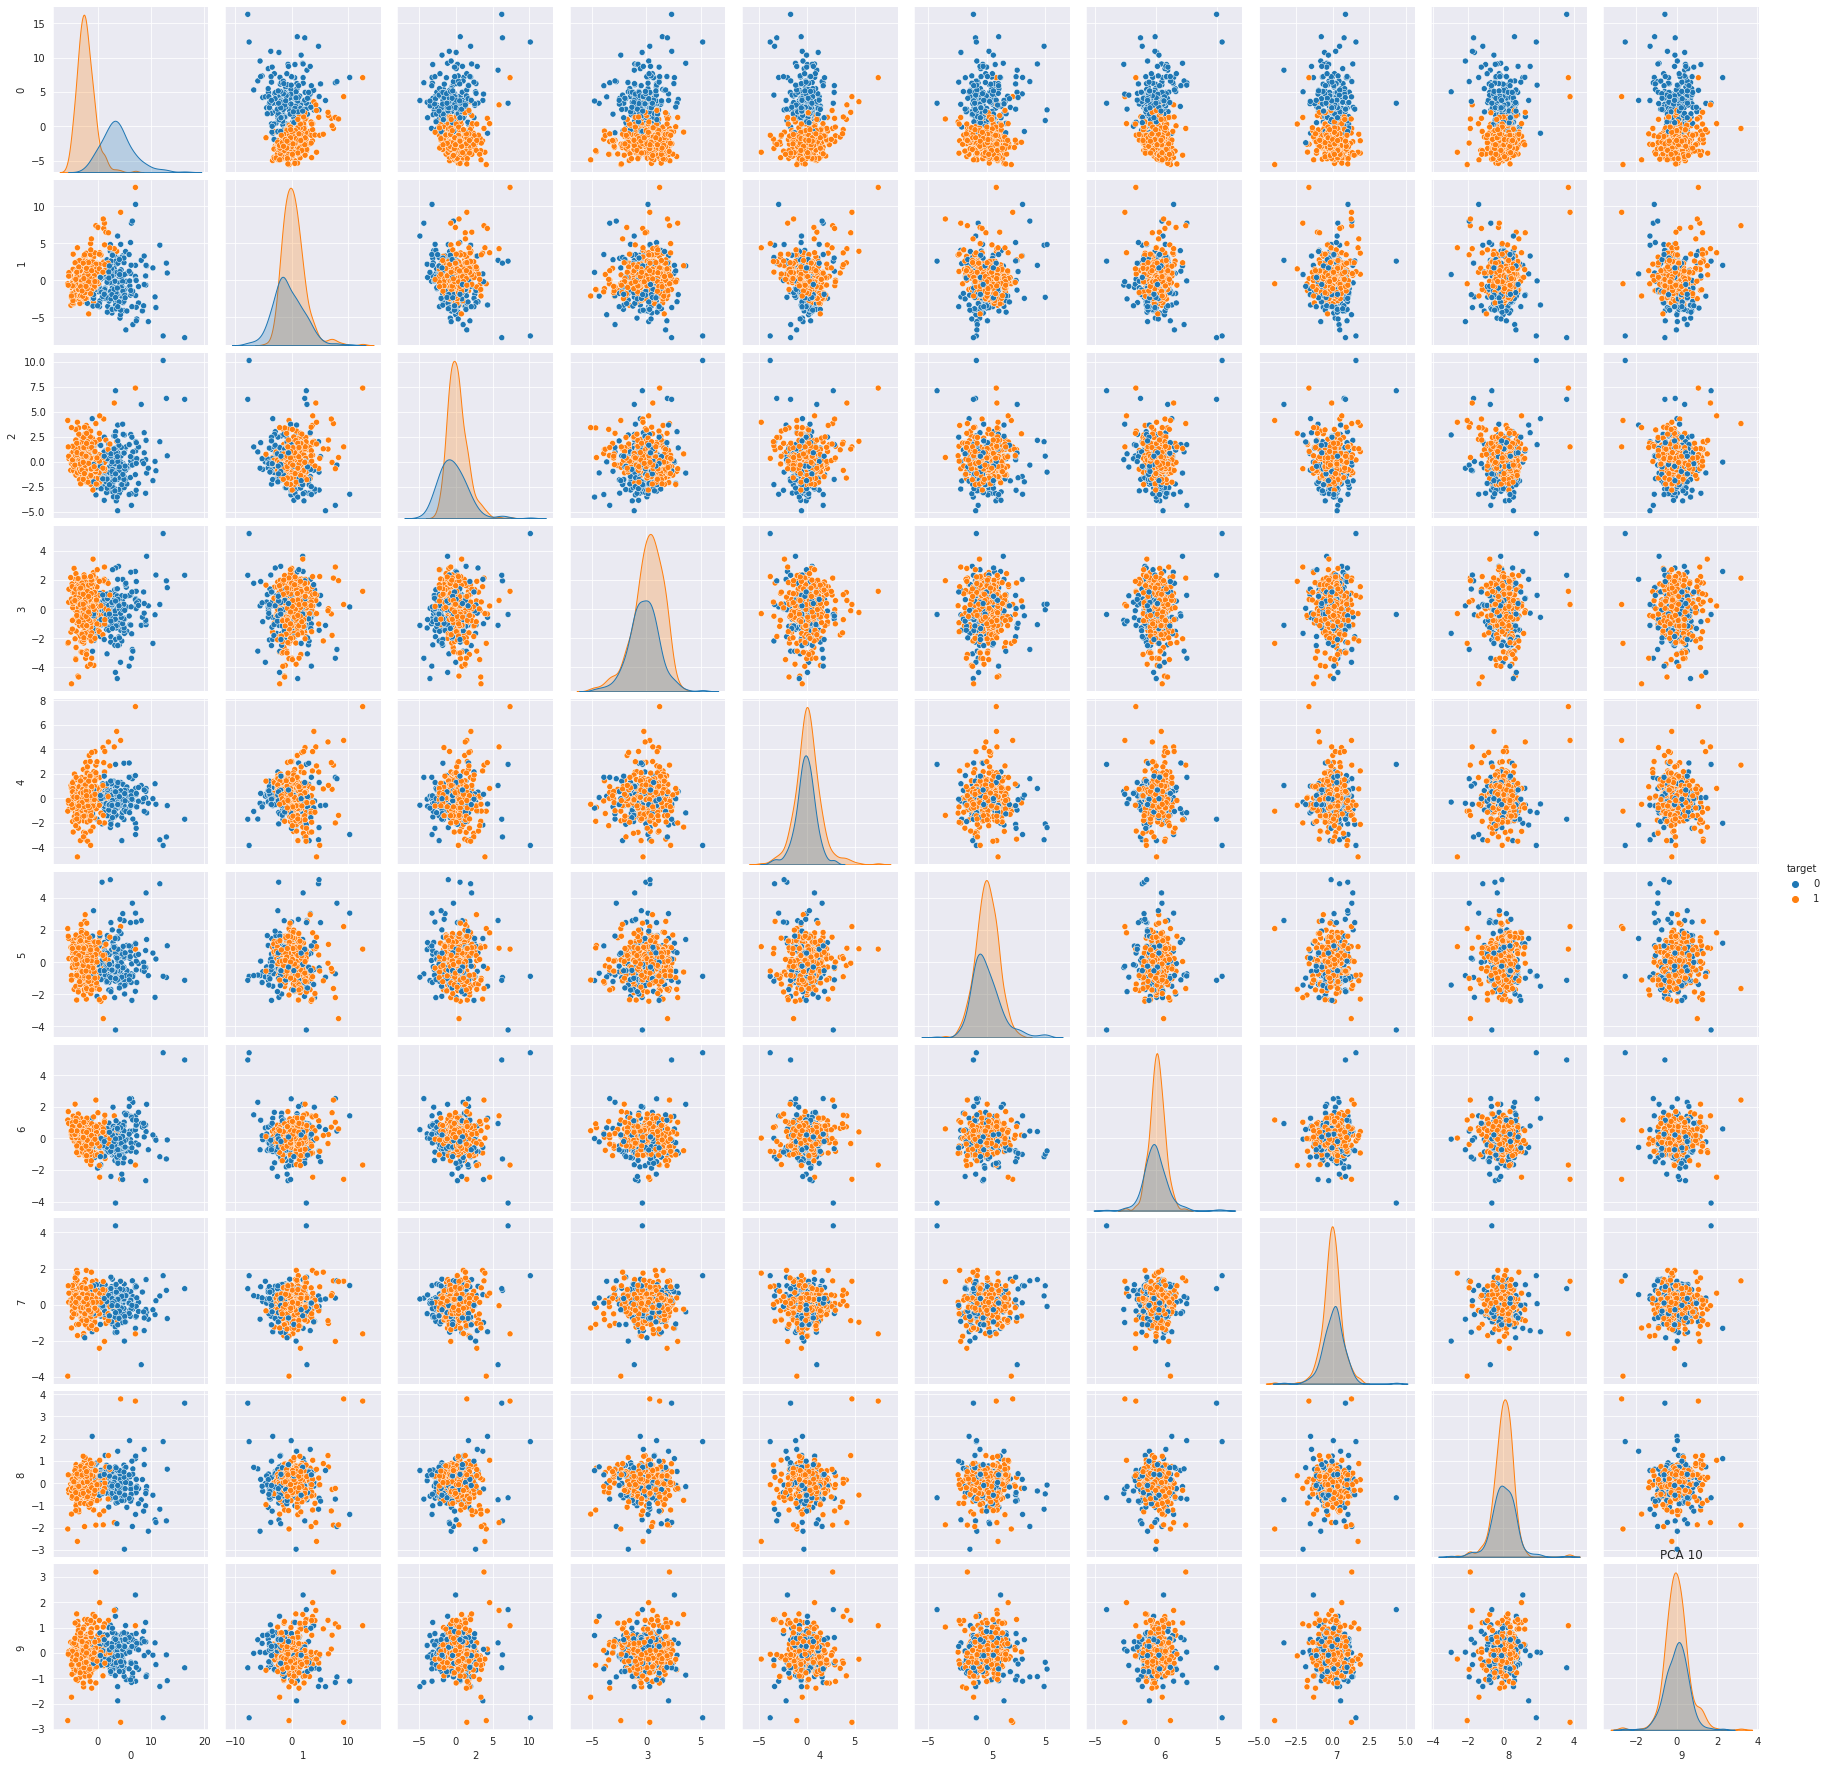

In [ ]:
sns.pairplot(cancer_df_pca_10, hue = 'target')
plt.title('PCA 10')
plt.show()

In [ ]:
print(pca_10.explained_variance_ratio_[:5].sum())

0.8473427431680722


In [ ]:
for i in range(1, 11):
    print('Number of Variables: {}'.format(i))
    print('Explained Variance Ratio Proportion: {}\n'.format(pca_10.explained_variance_ratio_[:i].sum()))

Number of Variables: 1
Explained Variance Ratio Proportion: 0.4427202560752634

Number of Variables: 2
Explained Variance Ratio Proportion: 0.632432076515594

Number of Variables: 3
Explained Variance Ratio Proportion: 0.726363709089908

Number of Variables: 4
Explained Variance Ratio Proportion: 0.7923850582446096

Number of Variables: 5
Explained Variance Ratio Proportion: 0.8473427431680722

Number of Variables: 6
Explained Variance Ratio Proportion: 0.8875879635669057

Number of Variables: 7
Explained Variance Ratio Proportion: 0.9100953006967061

Number of Variables: 8
Explained Variance Ratio Proportion: 0.925982538696863

Number of Variables: 9
Explained Variance Ratio Proportion: 0.9398790324420473

Number of Variables: 10
Explained Variance Ratio Proportion: 0.9515688143065988



In [ ]:
no_of_variables = [i for i in range(1, 11)]
explained_variances = pca_10.explained_variance_
explained_variance_ratio_proportions = [pca_10.explained_variance_ratio_[:i].sum() for i in range(1, 11)]
explained_variance_df = pd.DataFrame({
    'Number of Variables': no_of_variables,
    'Explained Variance': explained_variances,
    'Explained Variance Ratio Proportion': explained_variance_ratio_proportions
})

explained_variance_df

,Number of Variables,Explained Variance,Explained Variance Ratio Proportion
0,1,13.304991,0.442720
1,2,5.701375,0.632432
2,3,2.822910,0.726364
3,4,1.984128,0.792385
4,5,1.651633,0.847343
5,6,1.209482,0.887588
6,7,0.676409,0.910095
7,8,0.477456,0.925983
8,9,0.417629,0.939879
9,10,0.351311,0.951569


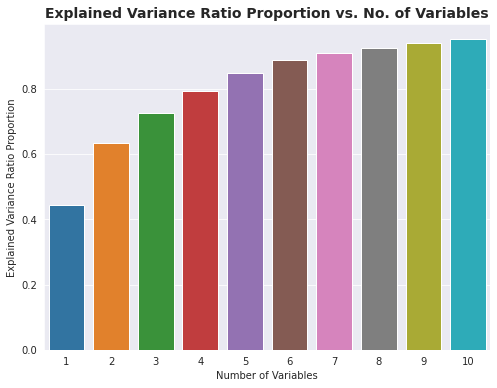

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Number of Variables', y = 'Explained Variance Ratio Proportion', data = explained_variance_df)
plt.title('Explained Variance Ratio Proportion vs. No. of Variables', fontsize = 14, fontweight = 'bold')
plt.show()

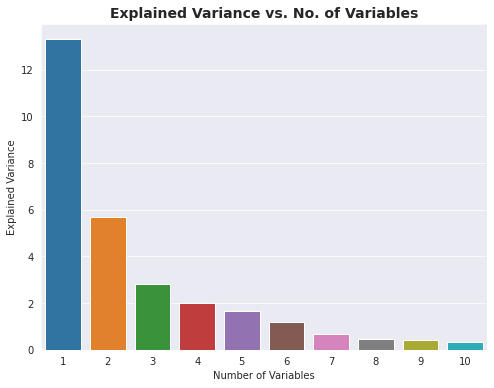

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Number of Variables', y = 'Explained Variance', data = explained_variance_df)
plt.title('Explained Variance vs. No. of Variables', fontsize = 14, fontweight = 'bold')
plt.show()

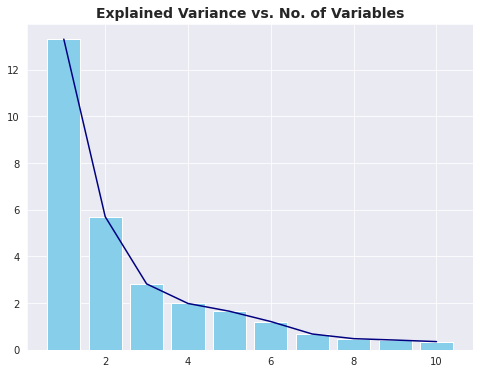

In [ ]:
plt.figure(figsize = (8, 6))
plt.bar(x = explained_variance_df['Number of Variables'], height = explained_variance_df['Explained Variance'], 
        color = 'skyblue')
plt.plot(explained_variance_df['Number of Variables'], explained_variance_df['Explained Variance'], 
         color = 'navy')
plt.title('Explained Variance vs. No. of Variables', fontsize = 14, fontweight = 'bold')
plt.show()

Let's take 5 as the number of components for PCA.

# PCA With 5 Components

In [ ]:
pca_5 = PCA(n_components = 5)
pca_5_data = pca_5.fit_transform(cancer_df_scaled)
pca_5_data

array([[ 9.19283683,  1.94858306, -1.12316601,  3.6337304 , -1.19510944],
       [ 2.3878018 , -3.76817173, -0.52929266,  1.11826408,  0.62177464],
       [ 5.73389628, -1.0751738 , -0.55174772,  0.91208256, -0.17708547],
       ...,
       [ 1.25617928, -1.90229671,  0.56273058, -2.08922698,  1.80999122],
       [10.37479406,  1.67201011, -1.87702917, -2.35603117, -0.03374212],
       [-5.4752433 , -0.67063681,  1.49044323, -2.29915768, -0.18470249]])

In [ ]:
cancer_df_pca_5 = pd.DataFrame(pca_5_data)
cancer_df_pca_5.head()

,0,1,2,3,4
0,9.192837,1.948583,-1.123166,3.633730,-1.195109
1,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085
3,7.122953,10.275589,-3.232790,0.152547,-2.960879
4,3.935302,-1.948072,1.389767,2.940640,0.546747


In [ ]:
# %%timeit
kmeans_pca_5 = KMeans(n_clusters = 2, random_state = 42)
kmeans_pca_5.fit(cancer_df_pca_5)

KMeans(n_clusters=2, random_state=42)

In [ ]:
kmeans_pca_5.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
ari_pca_5 = adjusted_rand_score(kmeans_pca_5.labels_, actual_values)
ari_pca_5

0.6707206476880808

In [ ]:
cancer_df_pca_5['target'] = kmeans_pca_5.labels_

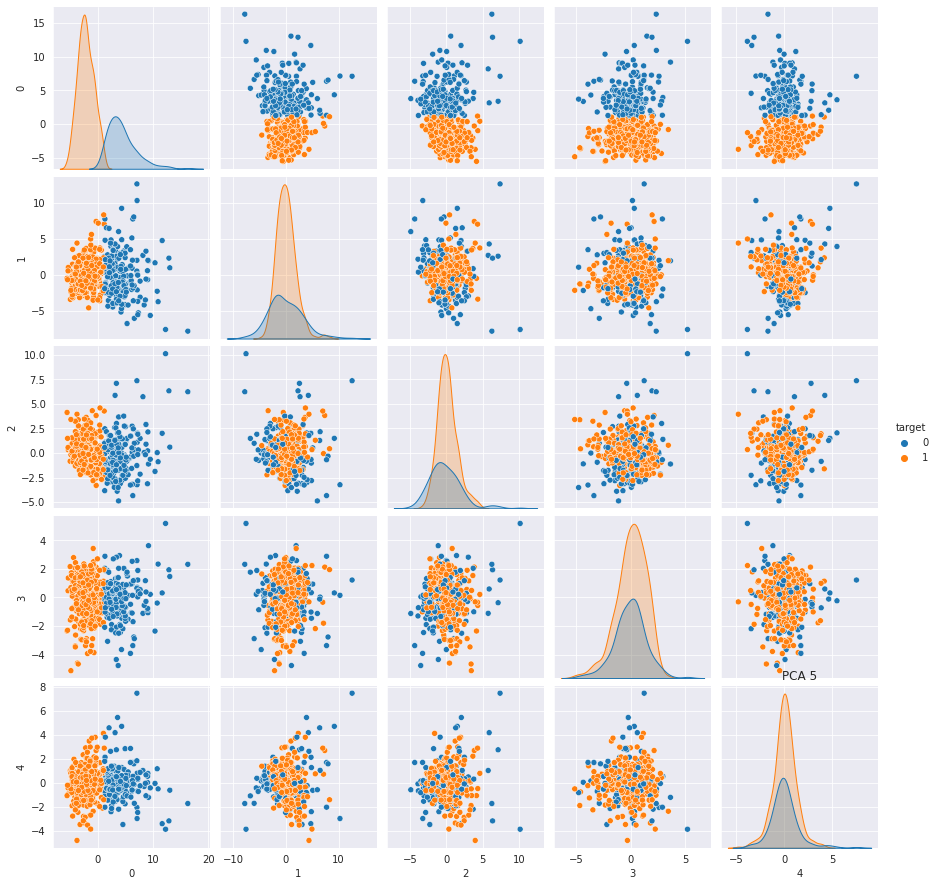

In [ ]:
sns.pairplot(cancer_df_pca_5, hue = 'target')
plt.title('PCA 5')
plt.show()

In [ ]:
data_status = ['Before Scaling', 'After Scaling', 'PCA with 10 Components', 'PCA with 5 Components']
ari_scores = [ari_before_scaling, ari_after_scaling, ari_pca_10, ari_pca_5]
ari_scores_df = pd.DataFrame({
    'Data Status': data_status,
    'ARI Score': ari_scores
})

ari_scores_df

,Data Status,ARI Score
0,Before Scaling,0.491425
1,After Scaling,0.670721
2,PCA with 10 Components,0.670721
3,PCA with 5 Components,0.670721


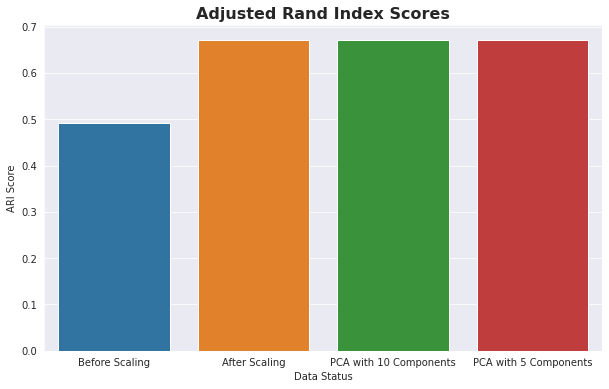

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Data Status', y = 'ARI Score', data = ari_scores_df)
plt.title('Adjusted Rand Index Scores', fontsize = 16, fontweight = 'bold')
plt.show()